In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
df_mouse_b_enac = pd.read_csv('mouse_b_enac_summary_new.csv')
df_mouse_b_enac = df_mouse_b_enac.drop('Genotype', axis=1)
df_mouse_b_enac.shape

(28, 8)

In [19]:
# One more column for genotype
df_mouse_mps = pd.read_csv('mouse_mps_summary.csv')
df_mouse_mps = df_mouse_mps.drop('Genotype', axis=1)
df_mouse_mps.shape

(33, 8)

In [20]:
df_rat_pa = pd.read_csv('rat_pa_summary.csv')
df_rat_pa = df_rat_pa.drop('Genotype', axis=1)
df_rat_pa.shape

(83, 8)

In [21]:
df_rat_sterile_baseline = pd.read_csv('rat_sterile_baseline_summary.csv')
df_rat_sterile_baseline.shape

(51, 8)

In [22]:
df_rat_sterile_post_beads = pd.read_csv('rat_sterile_post_beads_summary.csv')
df_rat_sterile_post_beads.shape

(53, 8)

In [23]:
df_sheep_01_60 = pd.read_csv('sheep_01_60_summary.csv')
df_sheep_01_60.shape

(62, 8)

# PCA

# Rat bead study  (baseline vs post beads)

In [24]:
def pca(features, labels, title):

    # Standardize the features
    scaler = StandardScaler()
    features_standardized = scaler.fit_transform(features)

    # Apply PCA with two components
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_standardized)

    # Create a new DataFrame with the principal components and class labels
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['target'] = labels

    # Plot the PCA results
    plt.figure(figsize=(8, 6))
    classes = pca_df['target'].unique()

    for c in classes:
        subset = pca_df[pca_df['target'] == c]
        plt.scatter(subset['PC1'], subset['PC2'], label=c)

    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

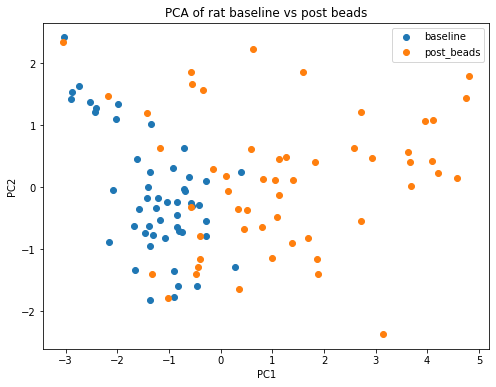

In [25]:
# label the dataframe
df_rat_sterile_baseline['target'] = 'baseline'
df_rat_sterile_post_beads['target'] = 'post_beads'

# combine the dataframe
df_rat_combine = pd.concat([df_rat_sterile_baseline, df_rat_sterile_post_beads], ignore_index=True)

# features and labels
features = df_rat_combine.iloc[:,2:8]
labels = df_rat_combine['target']

pca(features, labels, 'PCA of rat baseline vs post beads')

# Rat_PA study (WT, KO, CF)

In [26]:
df_rat_pa = pd.read_csv('rat_pa_summary.csv')
df_rat_WT = df_rat_pa[df_rat_pa['Genotype'] == 'WT']
df_rat_KO = df_rat_pa[df_rat_pa['Genotype'] == 'KO']
df_rat_CF = df_rat_pa[df_rat_pa['Genotype'] == 'CF']

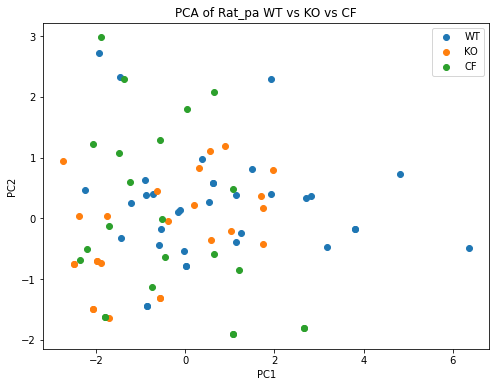

In [27]:
# combine the dataframe
df_rat_combine = pd.concat([df_rat_WT, df_rat_KO, df_rat_CF], ignore_index=True)

# features and labels
features = df_rat_combine.iloc[:,3:9]
labels = df_rat_combine['Genotype']

pca(features, labels, 'PCA of Rat_pa WT vs KO vs CF')

# Mouse B-Enac study (B-Enac vs WT)

In [28]:
df_mouse_b_enac = pd.read_csv('mouse_b_enac_summary_new.csv')
df_WT = df_mouse_b_enac[df_mouse_b_enac['Genotype'] == 'WT']
df_b_enac = df_mouse_b_enac[df_mouse_b_enac['Genotype'] == 'B_Enac']

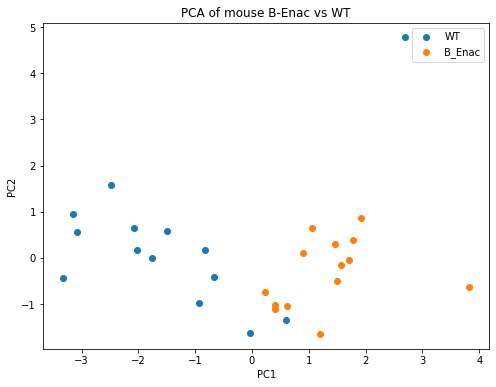

In [29]:
# combine the dataframe
df_mouse_combine = pd.concat([df_WT, df_b_enac], ignore_index=True)

# features and labels
features = df_mouse_combine.iloc[:,3:9]
labels = df_mouse_combine['Genotype']

pca(features, labels, 'PCA of mouse B-Enac vs WT')

# Mouse MPS study (MPS_I vs WT vs Het)

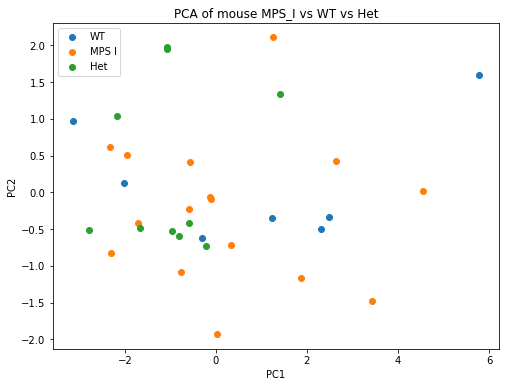

In [30]:
df_mouse_mps = pd.read_csv('mouse_mps_summary.csv')
df_WT = df_mouse_mps[df_mouse_mps['Genotype'] == 'WT']
df_MPS_I = df_mouse_mps[df_mouse_mps['Genotype'] == 'MPS I']
df_Het = df_mouse_mps[df_mouse_mps['Genotype'] == 'Het']

# combine the dataframe
df_mouse_combine = pd.concat([df_WT, df_MPS_I, df_Het], ignore_index=True)

# features and labels
features = df_mouse_combine.iloc[:,3:9]
labels = df_mouse_combine['Genotype']

pca(features, labels, 'PCA of mouse MPS_I vs WT vs Het')